### DEPENDENCIES

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

### IMPORT CSV

In [2]:
#load assesment file

fb = "resources/HistoricalData_fb.csv"
fb_df = pd.read_csv(fb)
fb_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$324.63,16445360,$318.21,$325.95,$318.03
1,05/21/2021,$316.23,13600900,$319.29,$319.93,$315.8101
2,05/20/2021,$318.61,17320240,$313.58,$319.25,$313.16
3,05/19/2021,$313.59,19106240,$304.185,$314.66,$303.57
4,05/18/2021,$309.96,14522400,$315.59,$316.5,$309.81


### CLEAN, RESHAPE AND CONVERT DATATYPE

In [3]:
fb_df['Date']= pd.to_datetime(fb_df['Date'])
fb_df['Close/Last'] = fb_df['Close/Last'].str.replace('$','')
fb_df['Open'] = fb_df['Open'].str.replace('$','')
fb_df['High'] = fb_df['High'].str.replace('$','')
fb_df['Low'] = fb_df['Low'].str.replace('$','')
fb_df = fb_df.apply( pd.to_numeric)

### FORMAT DATE COLUMN

In [4]:
fb_df['Date']= pd.to_datetime(fb_df['Date'])
fb_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,324.63,16445360,318.210,325.95,318.0300
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100


### CREATE ADDITIONAL DATA

In [5]:
fb_df['Open_Close'] = (fb_df['Open'] - fb_df['Close/Last'])/fb_df['Open']
fb_df['High_Low'] = (fb_df['High'] - fb_df['Low'])/fb_df['Low']
fb_df['Increase_Decrease'] = np.where(fb_df['Volume'].shift(-1) > fb_df['Volume'],1,0)
fb_df['Buy_Sell_on_Open'] = np.where(fb_df['Open'].shift(-1) > fb_df['Open'],1,0)
fb_df['Buy_Sell'] = np.where(fb_df['Close/Last'].shift(-1) > fb_df['Close/Last'],1,0)
fb_df['Returns'] = fb_df['Close/Last'].pct_change()
fb_df = fb_df.dropna()
fb_df.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101,0.009584,0.013045,1,0,1,-0.025876
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600,-0.016041,0.019447,1,0,0,0.007526
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700,-0.030919,0.036532,0,1,0,-0.015756
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100,0.017840,0.021594,1,0,1,-0.011576
5,2021-05-17,315.46,15371050,313.550,315.68,311.5800,-0.006092,0.013159,1,0,1,0.017744


### SPLIT DATAFRAME

In [6]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = fb_df["Date"] >= start_date
before_end_date = fb_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
fb_df_4 = fb_df.loc[between_two_dates]
fb_df_4.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
252,2020-05-22,234.91,33925560,231.51,235.9900,228.74,-0.014686,0.031695,1,1,0,0.011671
253,2020-05-21,231.39,47782640,234.72,237.2000,231.20,0.014187,0.025952,1,0,0,-0.014984
254,2020-05-20,229.97,50162880,223.50,231.3400,223.19,-0.028949,0.036516,0,0,0,-0.006137
255,2020-05-19,216.88,31843150,213.27,220.4900,212.83,-0.016927,0.035991,0,0,0,-0.056920
256,2020-05-18,213.19,20167440,212.15,214.6445,210.94,-0.004902,0.017562,0,0,0,-0.017014


### SPLIT DATAFRAME

In [7]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = fb_df["Date"] >= start_date
before_end_date = fb_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
fb_df_ls = fb_df.loc[between_two_dates]
fb_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101,0.009584,0.013045,1,0,1,-0.025876
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600,-0.016041,0.019447,1,0,0,0.007526
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700,-0.030919,0.036532,0,1,0,-0.015756
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100,0.017840,0.021594,1,0,1,-0.011576
5,2021-05-17,315.46,15371050,313.550,315.68,311.5800,-0.006092,0.013159,1,0,1,0.017744


### PLOT 1ST  DF (4YEARS)

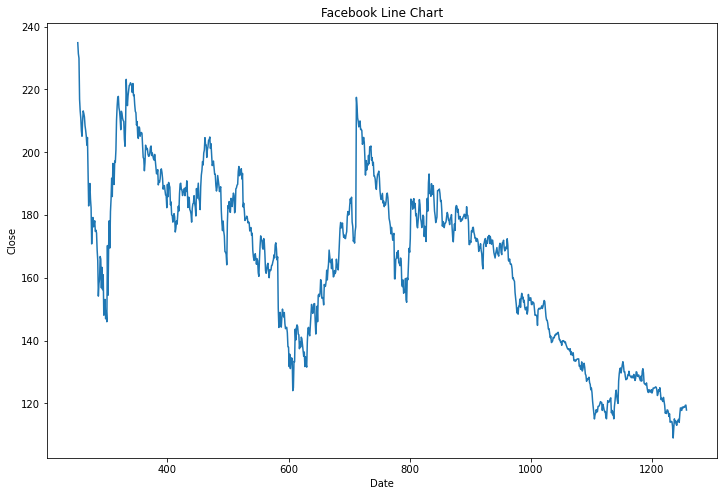

In [8]:
plt.figure(figsize=(12,8))
plt.plot(fb_df_4['Close/Last'])
plt.title("Facebook Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

### PLOT SECOND DF (LAST YEAR)

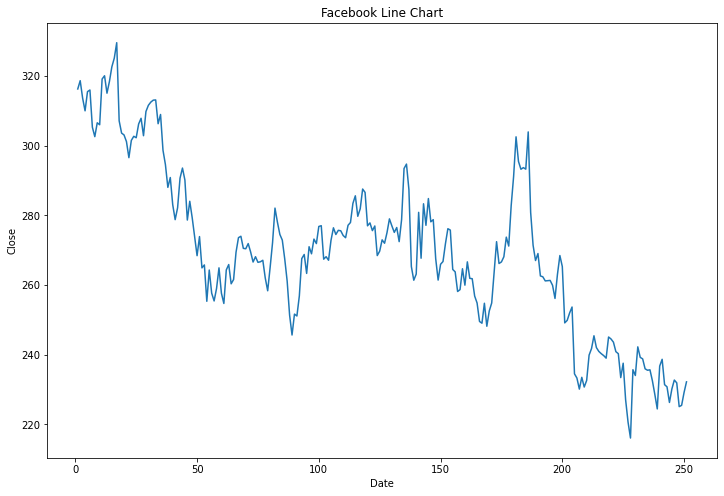

In [9]:
plt.figure(figsize=(12,8))
plt.plot(fb_df_ls['Close/Last'])
plt.title("Facebook Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

### SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [11]:
fb_df_4.shape

(1006, 12)

In [13]:
X = np.array(fb_df_4['Open']).reshape(1006,-1)
Y = np.array(fb_df_4['Close/Last']).reshape(1006,-1)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X, Y)

LinearRegression()

In [16]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.30037687]
coefficient count: 1


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.992608787883672


In [18]:
# Predicting the price
lr.predict(X)

array([[231.52151514],
       [234.72750993],
       [223.52150945],
       ...,
       [119.7111984 ],
       [118.3928454 ],
       [118.28298265]])

In [19]:
#daily Return
DA_RE = fb_df_4['Close/Last'].pct_change(1)
DA_RE.head()

252         NaN
253   -0.014984
254   -0.006137
255   -0.056920
256   -0.017014
Name: Close/Last, dtype: float64

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

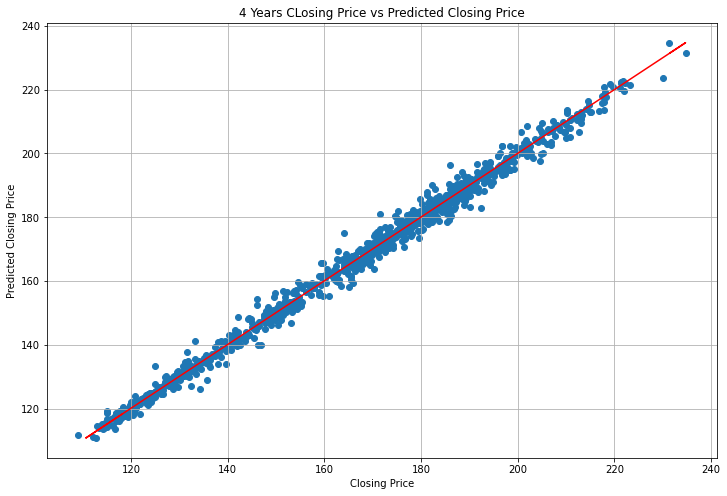

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(fb_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/fb_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

### TRAINING, TESTING ML ON 2ND DF

In [22]:
fb_df_ls.shape

(251, 12)

In [24]:
X_ls = np.array(fb_df_ls['Open']).reshape(251,-1)
Y_ls = np.array(fb_df_ls['Close/Last']).reshape(251,-1)

In [25]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [26]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [5.24631465]
coefficient count: 1


In [27]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9618323464269558


In [28]:
# Predicting the price
lr.predict(X_ls)

array([[318.33463695],
       [312.73554421],
       [303.52302647],
       [314.7065033 ],
       [312.70612691],
       [308.7740145 ],
       [305.38445515],
       [300.52736477],
       [300.15474564],
       [313.49058824],
       [321.36461883],
       [313.65728627],
       [317.25600262],
       [319.05536079],
       [325.08100438],
       [325.05550939],
       [328.95428219],
       [306.63635737],
       [303.61618126],
       [302.69443919],
       [298.20339808],
       [300.7234801 ],
       [301.32653475],
       [301.3706607 ],
       [304.32906049],
       [307.43062447],
       [305.63616918],
       [306.57752277],
       [311.39215418],
       [310.25468525],
       [310.59788709],
       [313.98087657],
       [305.63616918],
       [308.0846691 ],
       [300.29202637],
       [297.85039049],
       [289.60374076],
       [289.4468485 ],
       [285.46570725],
       [278.14276074],
       [280.76874504],
       [290.59412319],
       [292.70236301],
       [290

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

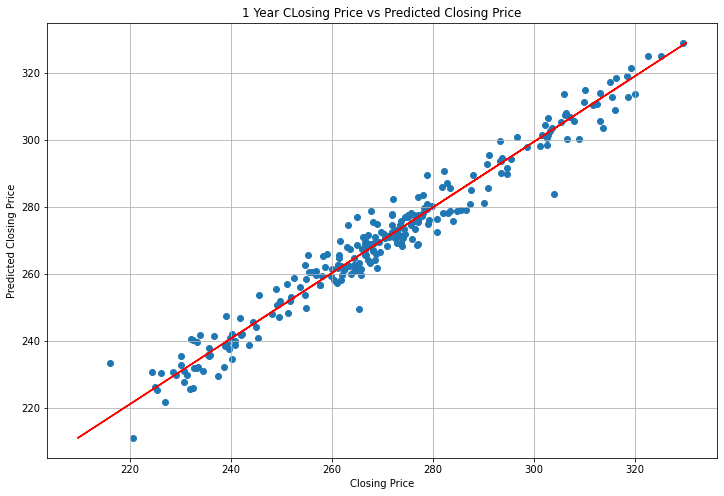

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(fb_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/fb_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')

### MODEL COMPARISON

<tr>
    <td> <img src="images/fb_4y.jpg"style="width: 550px;"/> </td>
    <td> <img src="images/fb_ls.jpg"style="width: 550px;"/> </td>
</tr>


In [33]:
fb_df.shape

(1257, 12)

In [34]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [38]:
Xc = np.array(fb_df['Returns'], dtype = float) # Feature
Yc = np.array(fb_df['Close/Last'], dtype = float) # Target

In [39]:
model.fit(Xc, Yc, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 769us/step - loss: 20183.8359
Epoch 2/100
40/40 [==============================] - 0s 615us/step - loss: 6015.7715
Epoch 3/100
40/40 [==============================] - 0s 667us/step - loss: 3182.8557
Epoch 4/100
40/40 [==============================] - 0s 692us/step - loss: 2616.1448
Epoch 5/100
40/40 [==============================] - 0s 692us/step - loss: 2501.2910
Epoch 6/100
40/40 [==============================] - 0s 615us/step - loss: 2476.4897
Epoch 7/100
40/40 [==============================] - 0s 615us/step - loss: 2470.4238
Epoch 8/100
40/40 [==============================] - 0s 590us/step - loss: 2469.6992
Epoch 9/100
40/40 [==============================] - 0s 744us/step - loss: 2468.6968
Epoch 10/100
40/40 [==============================] - 0s 667us/step - loss: 2469.9050
Epoch 11/100
40/40 [==============================] - 0s 692us/step - loss: 2469.0906
Epoch 12/100
40/40 [==============================] - 0s 615us

In [40]:
scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(np.array(fb_df['Returns']).reshape(1257,-1))
X = np.array(normalized_X, dtype = float)
normalized_Y = scaler.fit_transform(np.array(fb_df['Close/Last']).reshape(1257,-1))
Y = np.array(normalized_Y, dtype = float)

In [41]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [42]:
print((model.predict([0])))

[[186.07227]]
